<a href="https://colab.research.google.com/github/lcommons/portfolio/blob/master/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Use various Python tools to explore and model data
1. Do some data visualization with Matplotlib and Seaborn
1. Linear regression with sklearn

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
# load data from my github repo
github_url = 'https://raw.githubusercontent.com/lcommons/portfolio/master/data/Ecommerce%20Customers'
customers = pd.read_csv(github_url)

## Describe the data set

In [4]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
customers.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


## Start to visualize the data

In [0]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

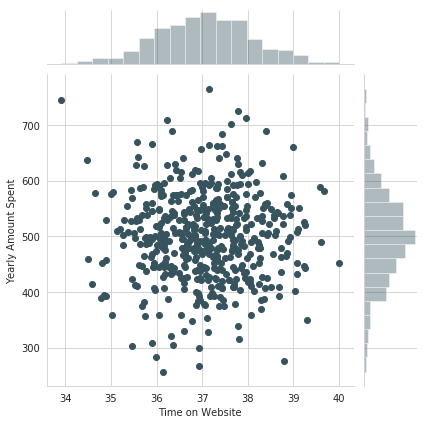

In [8]:
# More time on site, more money spent.
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)

It doesn't look like there's much correlation between these variables.

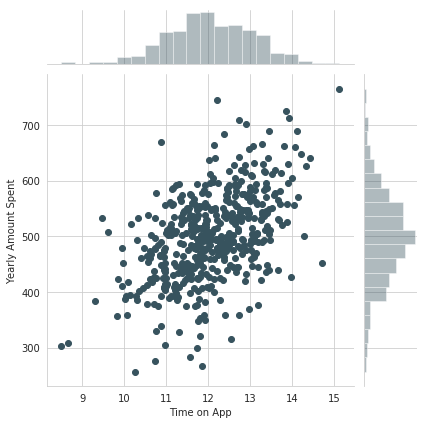

In [9]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers)

There appears to be much more correlation between these two variables.

## A pairplot will display plots for all combinations of variables.
This allows us to make a preliminary determination of variable correlation.

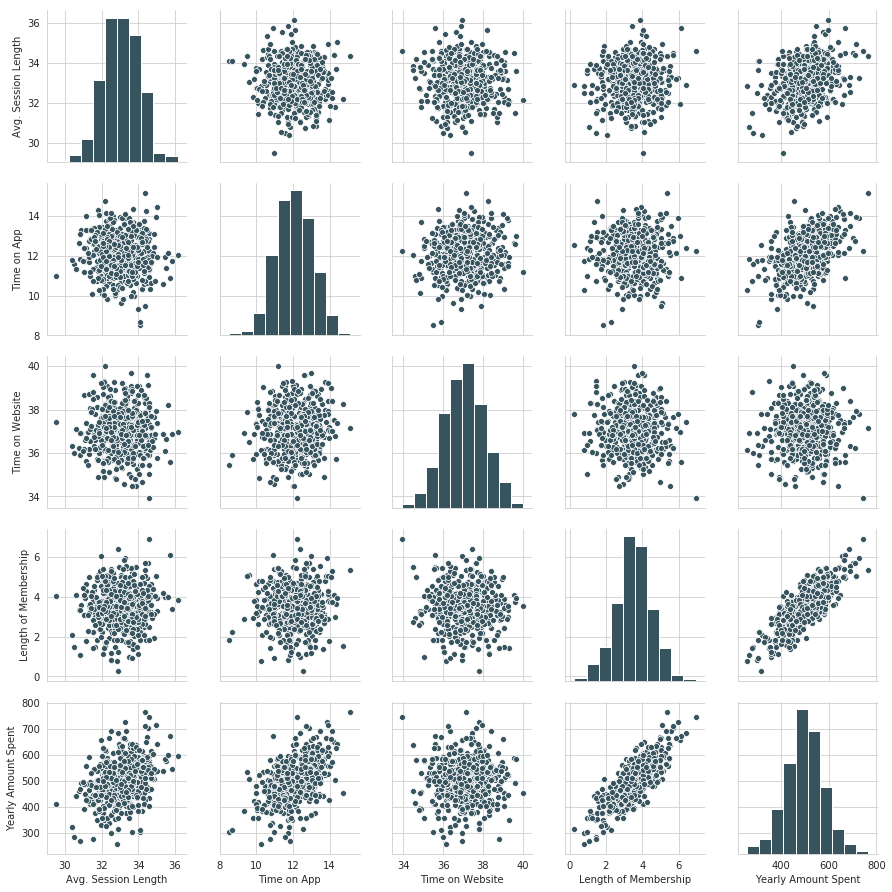

In [10]:
sns.pairplot(customers)


### Lets look at the pair of variables with the highest correlation:

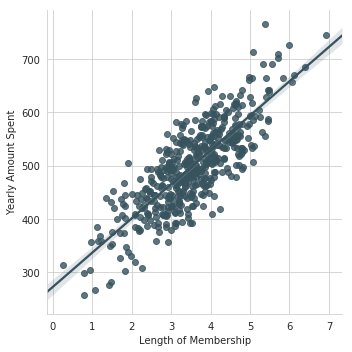

In [11]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

## Split the data into test and training sets

In [0]:
# This is the variable we want to predict
y = customers['Yearly Amount Spent']

In [0]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [0]:
# split the data in to training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [19]:
# create the linear regression model and fit the training data
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:

print('Linear Regression Coefficients: \n', lm.coef_)
print("Recall the variables being modeled:")
print("'Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership'")

Linear Regression Coefficients: 
 [25.98154972 38.59015875  0.19040528 61.27909654]
Recall the variables being modeled:
'Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership'


In [34]:
# Prettier presentation
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


## Now use the trained model to predict values on the test data set

In [0]:
predictions = lm.predict( X_test)

In [25]:
#Evaluate the model using standard metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.2281486534308295
MSE: 79.8130516509743
RMSE: 8.933815066978626


### plot the predicted values against the actual test values, and plot the residuals

Text(0, 0.5, 'Predicted Y')

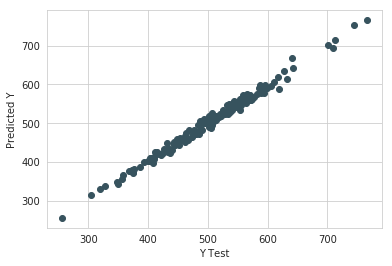

In [22]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

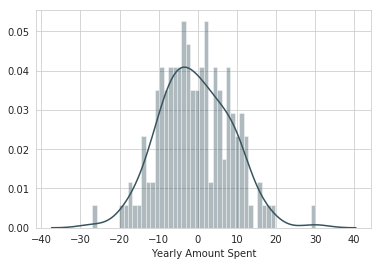

In [26]:
sns.distplot((y_test-predictions),bins=50);